# Linear Regression
### Parameters:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**

### Prediction: *level*
## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "abomination-vaults-bestiary.db",
    "age-of-ashes-bestiary.db",
    "agents-of-edgewatch-bestiary.db",
    "april-fools-bestiary.db",
    "blog-bestiary.db",
    "blood-lords-bestiary.db",
    "book-of-the-dead-bestiary.db",
    "crown-of-the-kobold-king-bestiary.db",
    "extinction-curse-bestiary.db",
    "fall-of-plaguestone.db",
    "fists-of-the-ruby-phoenix-bestiary.db",
    "gatewalkers-bestiary.db",
    "impossible-lands-bestiary.db",
    "kingmaker-bestiary.db",
    "malevolence-bestiary.db",
    "menace-under-otari-bestiary.db",
    "monsters-of-myth-bestiary.db",
    "mwangi-expanse-bestiary.db",
    "night-of-the-gray-death-bestiary.db",
    "npc-gallery.db",
    "one-shot-bestiary.db",
    "outlaws-of-alkenstar-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
    "pathfinder-bestiary.db",
    "pathfinder-dark-archive.db",
    "pfs-introductions-bestiary.db",
    "pfs-season-1-bestiary.db",
    "pfs-season-2-bestiary.db",
    "pfs-season-3-bestiary.db",
    "pfs-season-4-bestiary.db",
    "quest-for-the-frozen-flame-bestiary.db",
    "shadows-at-sundown-bestiary.db",
    "strength-of-thousands-bestiary.db",
    "the-slithering-bestiary.db",
    "travel-guide-bestiary.db",
    "troubles-in-otari-bestiary.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.head()

,wis,int,str,cha,hp,con,book,dex,ac,level
0,3.0,0.0,6.0,0.0,155,0.0,Pathfinder #165: Eyes of Empty Death,3.0,28.0,9
1,3.0,0.0,7.0,0.0,175,6.0,Pathfinder Abomination Vaults Hardcover Compil...,3.0,30.0,10
2,3.0,-2.0,4.0,1.0,38,1.0,Pathfinder #164: Hands of the Devil,3.0,17.0,2
3,3.0,0.0,3.0,1.0,140,3.0,Pathfinder #164: Hands of the Devil,4.0,27.0,8
4,4.0,2.0,-5.0,2.0,90,0.0,Pathfinder #165: Eyes of Empty Death,6.0,31.0,9


## Preprocessing and train test split

In [3]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[features] = pd.DataFrame(scaler.fit_transform(df[features]), index=df.index)
min_max_df["book"] = df["book"]
min_max_df["level"] = df["level"]

In [4]:
min_max_df.head()

,cha,con,dex,int,str,wis,ac,hp,book,level
0,0.294118,0.142857,0.470588,0.333333,0.647059,0.470588,0.509434,0.257095,Pathfinder #165: Eyes of Empty Death,9
1,0.294118,0.571429,0.470588,0.333333,0.705882,0.470588,0.547170,0.290484,Pathfinder Abomination Vaults Hardcover Compil...,10
2,0.352941,0.214286,0.470588,0.200000,0.529412,0.470588,0.301887,0.061770,Pathfinder #164: Hands of the Devil,2
3,0.352941,0.357143,0.529412,0.333333,0.470588,0.470588,0.490566,0.232053,Pathfinder #164: Hands of the Devil,8
4,0.411765,0.142857,0.647059,0.466667,0.000000,0.529412,0.566038,0.148581,Pathfinder #165: Eyes of Empty Death,9


### Chronological split

In [5]:
from training.splitting_dataset import split_dataframe

os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(min_max_df, test_size=0.31)
os.chdir("../notebooks/models/linear_regression")

In [6]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

In [7]:
y_train = y_train.astype("int64")
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1626 entries, 2574 to 1449
Series name: level
Non-Null Count  Dtype
--------------  -----
1626 non-null   int64
dtypes: int64(1)
memory usage: 25.4 KB


### Random split

In [8]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(min_max_df, chronological_split=False, test_size=0.25)

In [9]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## Linear Regression
### With chronological split

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict = model.predict(X_test)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2 = r2_score(y_train, y_pred_train)
print(f"R2 score:{r2:.2f}")

R2 score:0.98


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse:.2f}")
print(f"MAE test: {mae:.2f}")

RMSE train: 0.83
RMSE test: 0.99
MAE test: 0.67


In [12]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "basic", rmse, mae]

###### MAE by level

In [13]:
from training.results import plot_mae_by_level

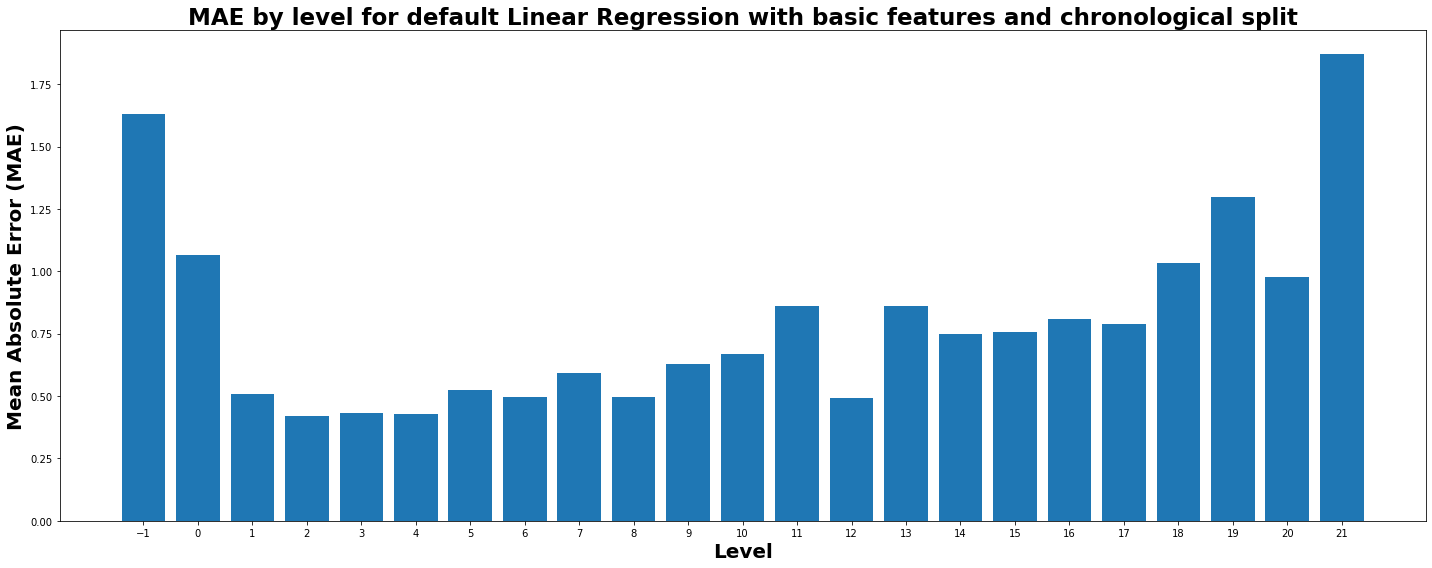

In [14]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default Linear Regression with basic features and chronological split",
)

In [15]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.99

Round type: 0.5
RMSE: 0.98

Round type: 0.33
RMSE: 0.97

Round type: 0.45
RMSE: 0.97



In [16]:
predict[predict < -1] = -1
predict[predict > 21] = 21

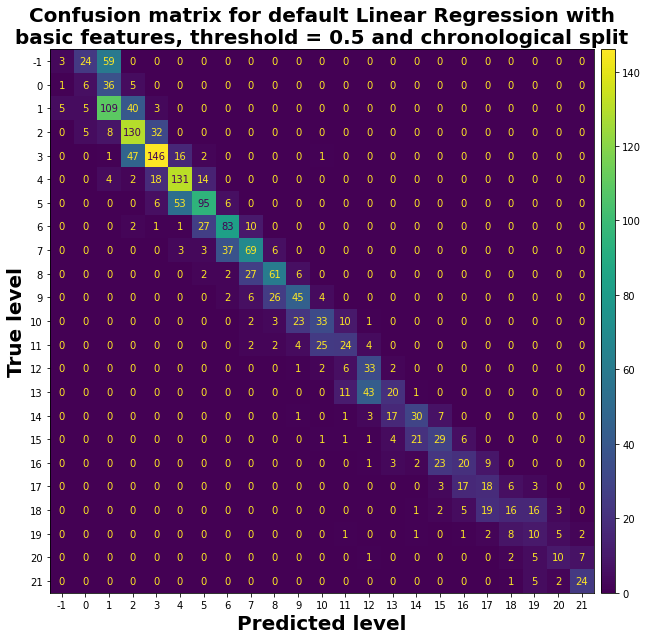

In [17]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for default Linear Regression with\nbasic features, threshold = 0.5 and chronological split",
)

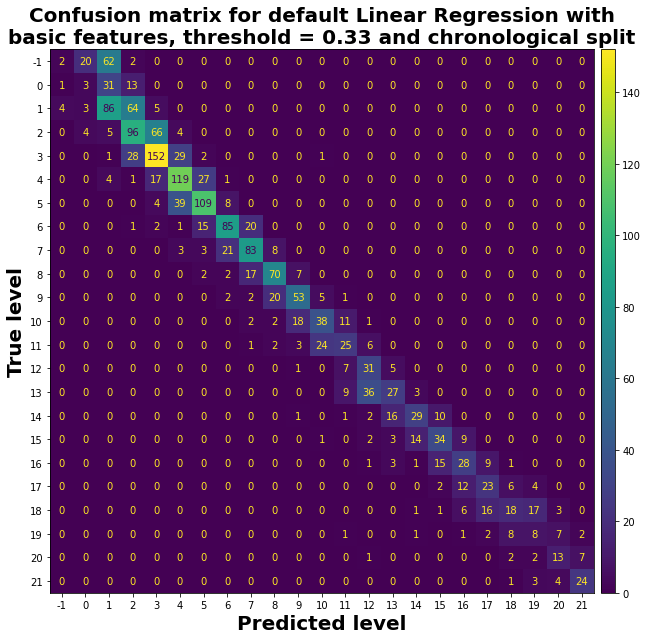

In [18]:
plot_confusion_matrix(
    predict,
    y_test,
    0.33,
    title="Confusion matrix for default Linear Regression with\nbasic features, threshold = 0.33 and chronological split",
)

### With random split

In [19]:
model = LinearRegression()
model.fit(X_train_random_split, y_train_random_split)

y_pred_train_random_split = model.predict(X_train_random_split)
y_pred_test_random_split = model.predict(X_test_random_split)

r2 = r2_score(y_train_random_split, y_pred_train_random_split)
print(f"R2 score:{r2:.2f}")

R2 score:0.97


In [20]:
rmse_train = mean_squared_error(
    y_train_random_split, y_pred_train_random_split, squared=False
)
rmse = mean_squared_error(y_test_random_split, y_pred_test_random_split, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test_random_split)

print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse:.2f}")
print(f"MAE test: {mae:.2f}")

RMSE train: 0.92
RMSE test: 0.88
MAE test: 0.59


In [21]:
results.loc[1] = ["random", "default", "basic", rmse, mae]

###### MAE by level

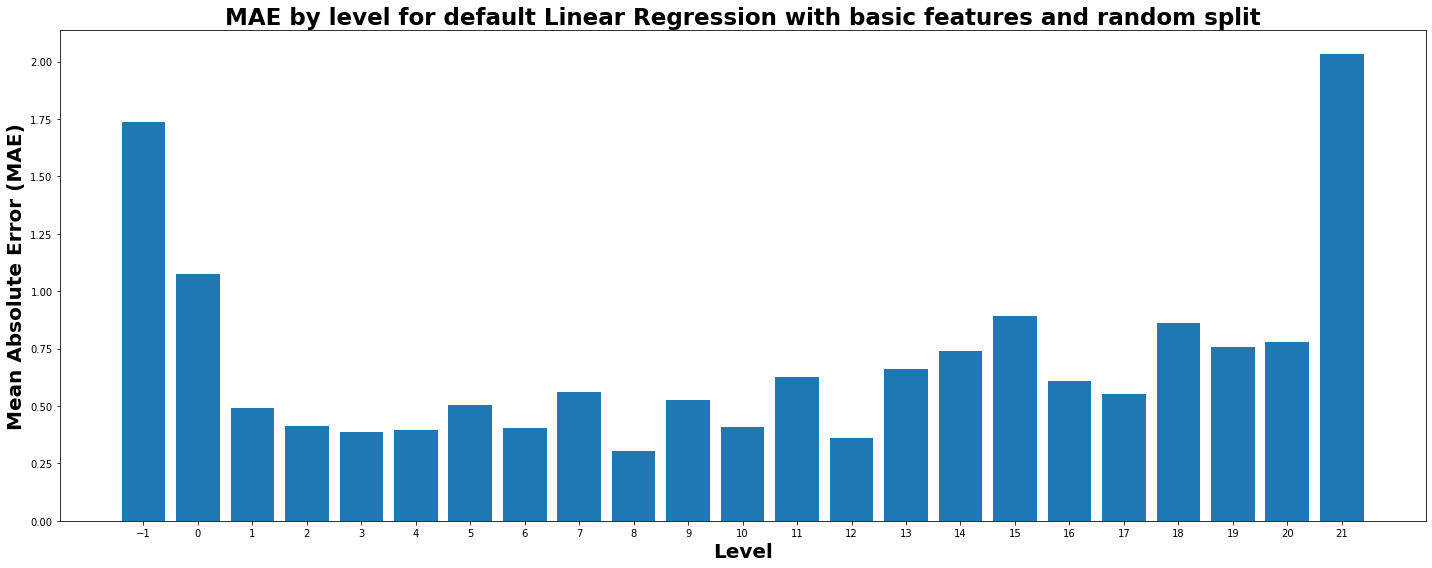

In [22]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for default Linear Regression with basic features and random split",
)

In [23]:
evaluate_round_predictions(
    [0.5, 0.33, 0.45], y_test_random_split, y_pred_test_random_split
)

Default:
RMSE: 0.88

Round type: 0.5
RMSE: 0.84

Round type: 0.33
RMSE: 0.86

Round type: 0.45
RMSE: 0.84



In [24]:
y_pred_test_random_split[y_pred_test_random_split < -1] = -1
y_pred_test_random_split[y_pred_test_random_split > 21] = 21

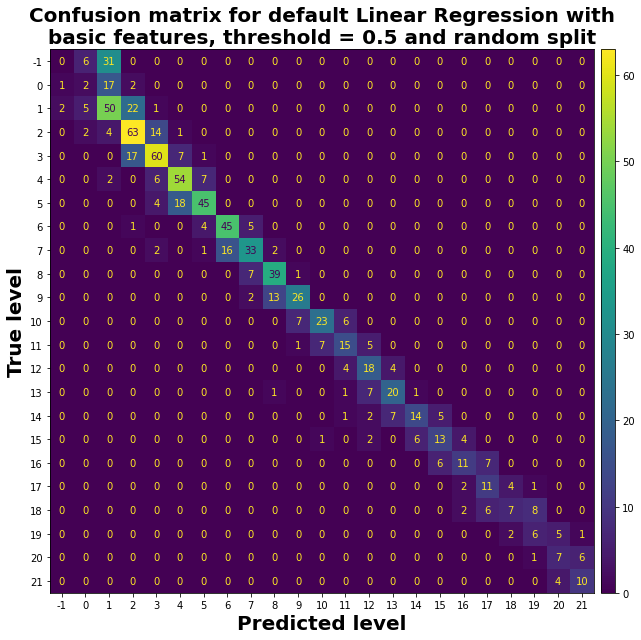

In [25]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    title="Confusion matrix for default Linear Regression with\nbasic features, threshold = 0.5 and random split",
)

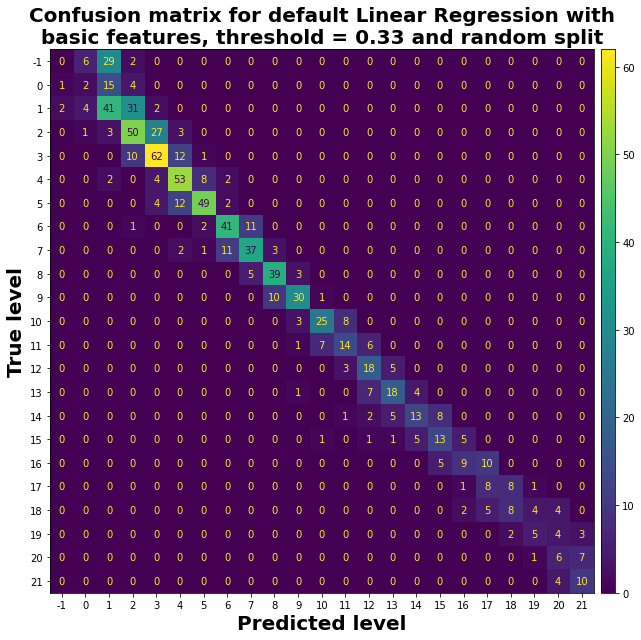

In [26]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    0.33,
    title="Confusion matrix for default Linear Regression with\nbasic features, threshold = 0.33 and random split",
)

## Tuning (ridge, LASSO)

### With chronological split

In [27]:
from sklearn.linear_model import RidgeCV, LassoCV
from training.results import assess_regression_model


reg_ridge_cv = RidgeCV(alphas=np.linspace(0.1, 100, 1000))
reg_lasso_cv = LassoCV(n_alphas=1000, random_state=0)

reg_ridge_cv = reg_ridge_cv.fit(X_train, y_train)
reg_lasso_cv = reg_lasso_cv.fit(
    X_train,
    np.array(y_train).reshape(
        y_train.size,
    ),
)

reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

print(f"Ridge CV alpha: {reg_ridge_cv.alpha_:.4f}")
print(f"Lasso CV alpha: {reg_lasso_cv.alpha_:.4f}")
print()

print("Linear Regression")
assess_regression_model(reg_linear, X_train, X_test, y_train, y_test, r2=True)

print("Ridge:")
rmse, mae = assess_regression_model(
    reg_ridge_cv, X_train, X_test, y_train, y_test, r2=True
)
results.loc[2] = ["chronological", "Ridge", "basic", rmse, mae]

print("Lasso:")
rmse, mae = assess_regression_model(
    reg_lasso_cv, X_train, X_test, y_train, y_test, r2=True
)
results.loc[3] = ["chronological", "Lasso", "basic", rmse, mae]

Ridge CV alpha: 0.1000
Lasso CV alpha: 0.0010

Linear Regression
R2: 0.98
RMSE train: 0.83
RMSE test: 0.99
MAE test: 0.67

Ridge:
R2: 0.98
RMSE train: 0.83
RMSE test: 0.99
MAE test: 0.67

Lasso:
R2: 0.98
RMSE train: 0.83
RMSE test: 0.99
MAE test: 0.66



###### MAE by level Ridge

In [28]:
y_pred_test = reg_ridge_cv.predict(X_test)

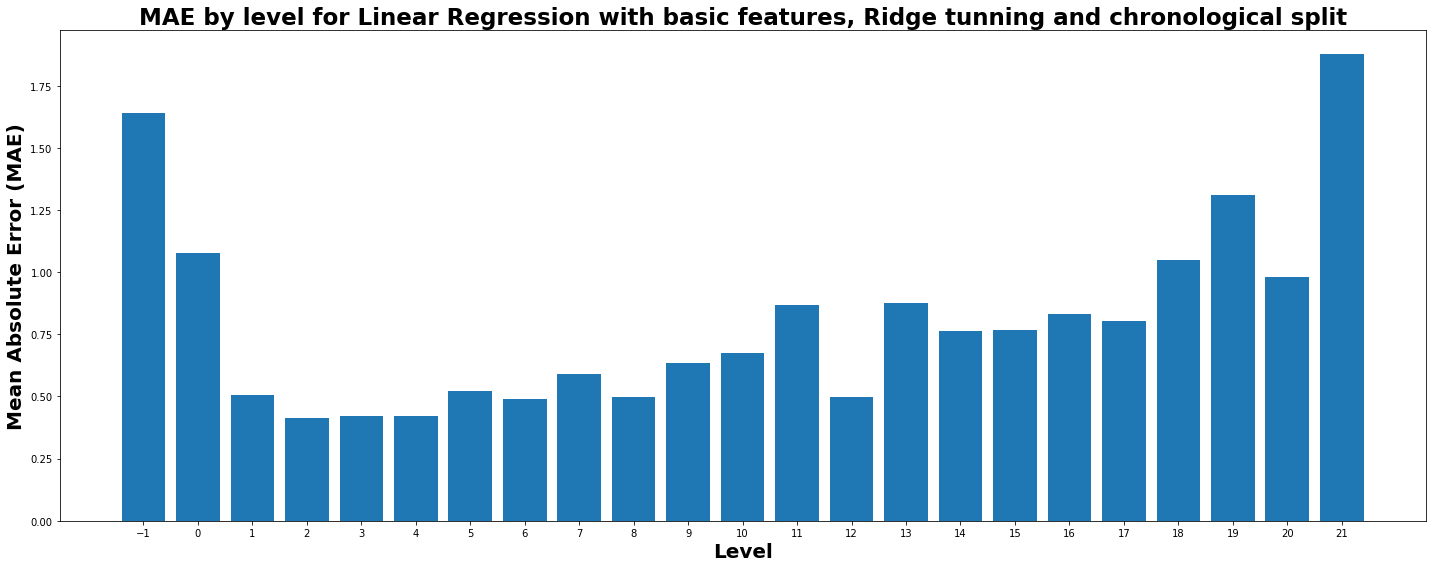

In [29]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for Linear Regression with basic features, Ridge tunning and chronological split",
)

###### MAE by level LASSO

In [30]:
y_pred_test = reg_lasso_cv.predict(X_test)

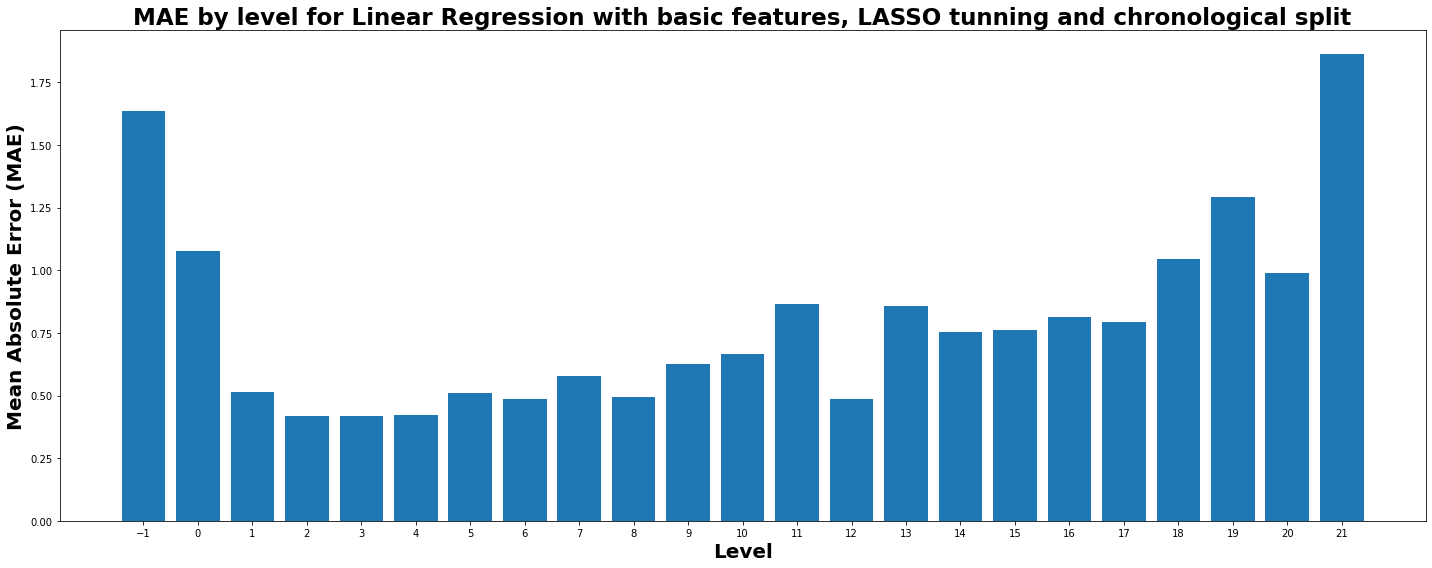

In [31]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for Linear Regression with basic features, LASSO tunning and chronological split",
)

Index(['cha', 'con', 'dex', 'int', 'str', 'wis', 'ac', 'hp'], dtype='object')
[-3.18659162e-01  1.07486028e+00 -1.44430481e+00  4.66451500e-03
 -1.25372761e+00  6.81362297e-01  2.34189322e+01  1.02279841e+01]


<AxesSubplot:title={'center':'Best features'}, ylabel='feature name'>

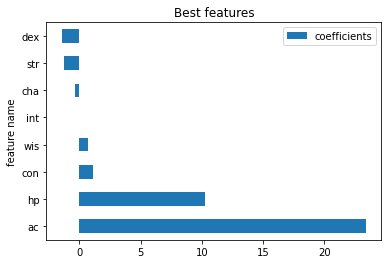

In [32]:
feature_names = X_train.columns
print(feature_names)
print(reg_ridge_cv.coef_)

ridgecv_coefficients = pd.DataFrame(
    {
        "feature name": features,
        "coefficients": reg_ridge_cv.coef_,
    }
)
best_features = ridgecv_coefficients.sort_values("coefficients", ascending=False)
best_features.plot.barh(x="feature name", y="coefficients", title="Best features")

In [33]:
sorted(feature_names[reg_lasso_cv.coef_ == 0])

['int']

### With random split

In [34]:
from sklearn.linear_model import RidgeCV, LassoCV

reg_ridge_cv = RidgeCV(alphas=np.linspace(1e-3, 1, 10000))
reg_lasso_cv = LassoCV(alphas=np.linspace(1e-4, 1e-1, 1000), random_state=0)

reg_ridge_cv = reg_ridge_cv.fit(X_train_random_split, y_train_random_split)
reg_lasso_cv = reg_lasso_cv.fit(
    X_train_random_split,
    np.array(y_train_random_split).reshape(
        y_train_random_split.size,
    ),
)

print(f"Ridge CV alphas: {reg_ridge_cv.alpha_:.4f}")
print(f"Lasso CV alpha: {reg_lasso_cv.alpha_:.4f}")
print()
print("Ridge:")
rmse, mae = assess_regression_model(
    reg_ridge_cv,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
    r2=True,
)
results.loc[4] = ["random", "Ridge", "basic", rmse, mae]

print("Lasso:")
rmse, mae = assess_regression_model(
    reg_lasso_cv,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
    r2=True,
)
results.loc[5] = ["random", "Lasso", "basic", rmse, mae]

Ridge CV alphas: 0.0413
Lasso CV alpha: 0.0004

Ridge:
R2: 0.97
RMSE train: 0.92
RMSE test: 0.88
MAE test: 0.59

Lasso:
R2: 0.97
RMSE train: 0.92
RMSE test: 0.89
MAE test: 0.59



###### MAE by level Ridge

In [35]:
y_pred_test_random_split = reg_ridge_cv.predict(X_test_random_split)

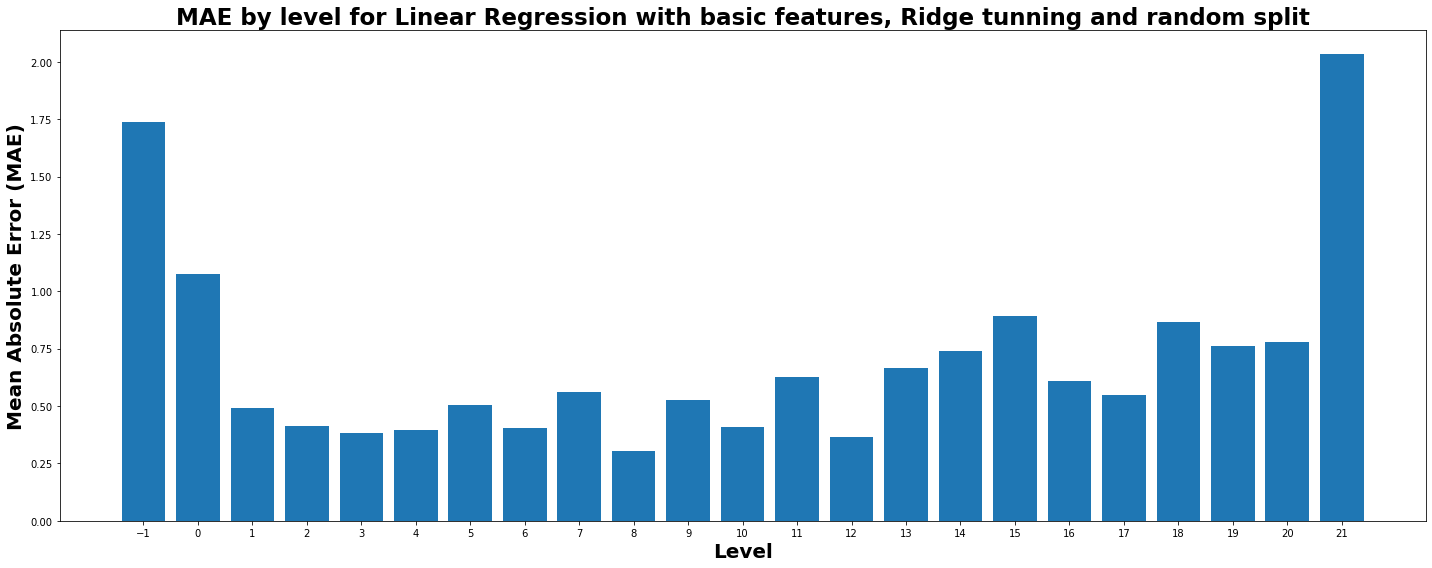

In [36]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for Linear Regression with basic features, Ridge tunning and random split",
)

###### MAE by level Lasso

In [37]:
y_pred_test_random_split = reg_lasso_cv.predict(X_test_random_split)

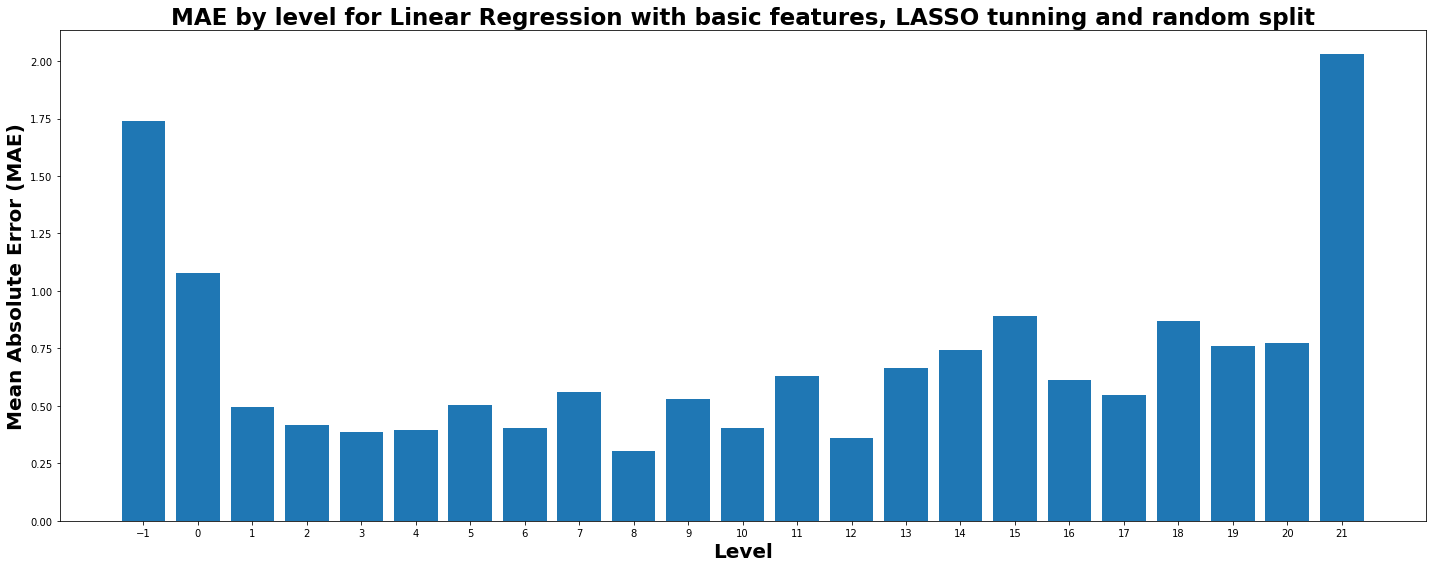

In [38]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for Linear Regression with basic features, LASSO tunning and random split",
)

Index(['cha', 'con', 'dex', 'int', 'str', 'wis', 'ac', 'hp'], dtype='object')
[-0.2486421   0.51942221 -1.28386069  0.27512153 -1.33227982  0.14077712
 23.17773411 11.17840448]


<AxesSubplot:title={'center':'Best features'}, ylabel='feature name'>

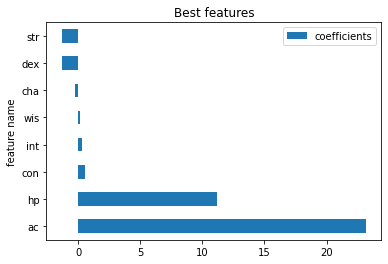

In [39]:
feature_names = X_train.columns
print(feature_names)
print(reg_ridge_cv.coef_)

ridgecv_coefficients = pd.DataFrame(
    {
        "feature name": features,
        "coefficients": reg_ridge_cv.coef_,
    }
)
best_features = ridgecv_coefficients.sort_values("coefficients", ascending=False)
best_features.plot.barh(x="feature name", y="coefficients", title="Best features")

In [40]:
eliminated_features = sorted(feature_names[reg_lasso_cv.coef_ == 0])
print(eliminated_features)

[]


## Summary

In [41]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,basic,0.988565,0.667662
1,random,default,basic,0.884995,0.590223
2,chronological,Ridge,basic,0.988885,0.669358
3,chronological,Lasso,basic,0.988471,0.664733
4,random,Ridge,basic,0.884996,0.590341
5,random,Lasso,basic,0.886048,0.590482


In [42]:
from training.results import plot_summary

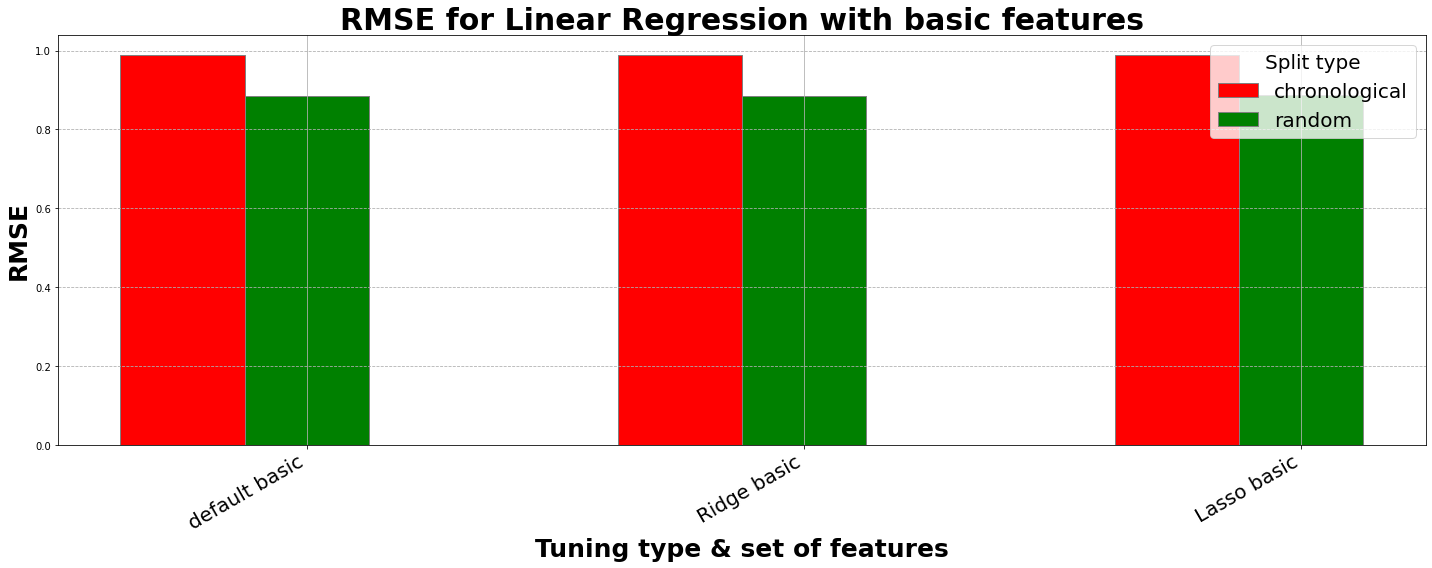

In [43]:
plot_summary(results, "RMSE", title="RMSE for Linear Regression with basic features")

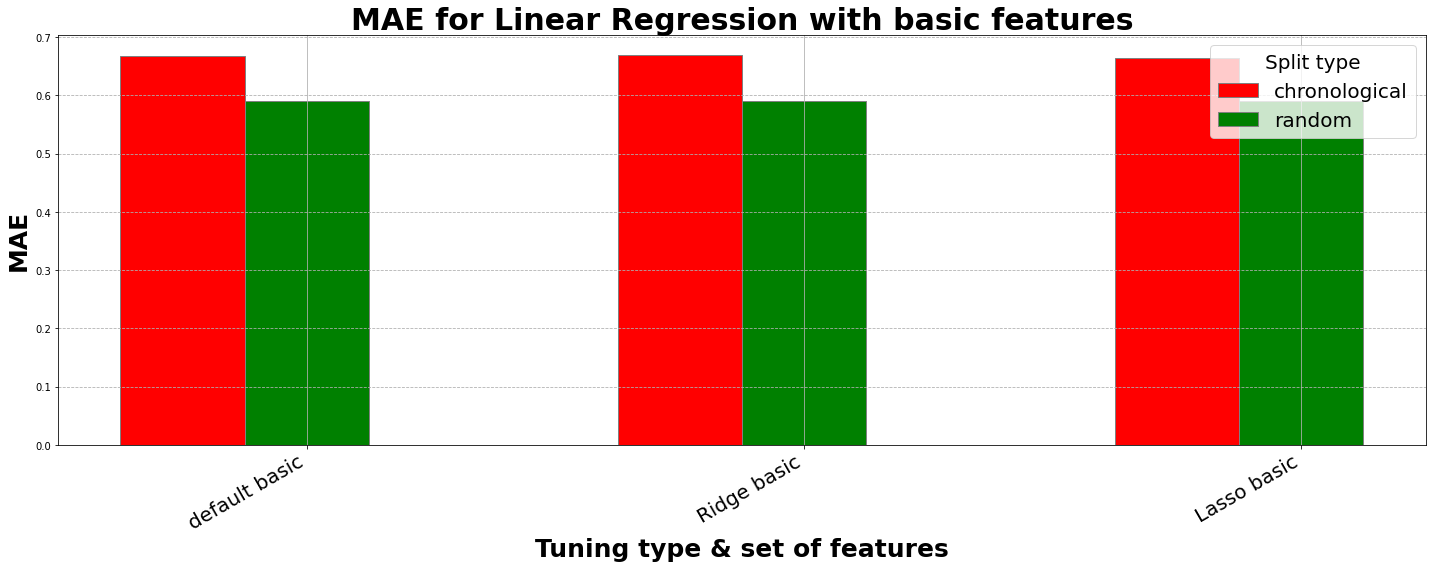

In [44]:
plot_summary(results, "MAE", title="MAE for Linear Regression with basic features")

In [45]:
results.to_csv("./linear_regression_basic_results.csv")